Device: cuda
Dataset: (8733, 9)
Unique mechanisms: 233
Train/Val/Test mechanisms: 163/35/35
Train/Val/Test samples: 7557/774/402
Vocab size: 1026
MAX_LEN: 512
Tasks | train:1500 val:300 test:500  (N=3,K=3,Q=5)
{'model': 'Token-CNN + MetaOptNet-Ridge', 'cosine_norm': True, 'rc_train': True, 'rc_prob': 0.25, 'max_len': 512, 'k': 5, 'dropout_support': 0.03, 'dropout_query': 0.01, 'lr': 0.0002, 'episodes': 1400, 'ridge_l2': 0.001}
Training MetaOptNet-Ridge...


  2%|▏         | 30/1400 [00:04<02:13, 10.27it/s]

[20/1400] loss=1.061  train=0.699±0.140  val=0.731±0.143  λ=1.0e-03
  -> New best model saved!


  4%|▎         | 52/1400 [00:05<01:55, 11.72it/s]

[40/1400] loss=1.045  train=0.703±0.135  val=0.724±0.144  λ=1.0e-03


  5%|▍         | 67/1400 [00:07<02:05, 10.61it/s]

[60/1400] loss=1.008  train=0.697±0.140  val=0.717±0.150  λ=1.0e-03


  6%|▋         | 88/1400 [00:09<01:59, 10.94it/s]

[80/1400] loss=0.999  train=0.712±0.139  val=0.703±0.155  λ=1.0e-03


  8%|▊         | 110/1400 [00:11<01:48, 11.84it/s]

[100/1400] loss=0.962  train=0.708±0.147  val=0.714±0.154  λ=1.0e-03


 10%|▉         | 133/1400 [00:13<01:41, 12.44it/s]

[120/1400] loss=0.960  train=0.709±0.140  val=0.703±0.160  λ=1.0e-03


 11%|█         | 148/1400 [00:15<01:52, 11.17it/s]

[140/1400] loss=0.964  train=0.708±0.140  val=0.703±0.155  λ=1.0e-03


 12%|█▏        | 170/1400 [00:17<01:43, 11.88it/s]

[160/1400] loss=0.958  train=0.713±0.140  val=0.693±0.155  λ=1.0e-03


 14%|█▎        | 192/1400 [00:18<01:39, 12.13it/s]

[180/1400] loss=0.956  train=0.711±0.135  val=0.711±0.152  λ=1.0e-03


 15%|█▍        | 206/1400 [00:20<01:58, 10.09it/s]

[200/1400] loss=0.933  train=0.727±0.128  val=0.698±0.156  λ=1.0e-03


 16%|█▋        | 228/1400 [00:22<01:44, 11.26it/s]

[220/1400] loss=0.937  train=0.724±0.139  val=0.703±0.154  λ=1.0e-03


 18%|█▊        | 250/1400 [00:24<01:36, 11.91it/s]

[240/1400] loss=0.955  train=0.724±0.120  val=0.704±0.158  λ=1.0e-03


 19%|█▉        | 272/1400 [00:26<01:32, 12.14it/s]

[260/1400] loss=0.968  train=0.739±0.138  val=0.710±0.152  λ=1.0e-03


 21%|██        | 288/1400 [00:28<01:38, 11.26it/s]

[280/1400] loss=0.988  train=0.736±0.119  val=0.707±0.161  λ=1.0e-03


 22%|██▏       | 310/1400 [00:30<01:31, 11.86it/s]

[300/1400] loss=0.939  train=0.736±0.135  val=0.704±0.160  λ=1.0e-03


 24%|██▎       | 331/1400 [00:32<01:33, 11.45it/s]

[320/1400] loss=0.909  train=0.737±0.128  val=0.706±0.156  λ=1.0e-03


 25%|██▌       | 352/1400 [00:34<01:33, 11.23it/s]

[340/1400] loss=0.968  train=0.740±0.132  val=0.699±0.161  λ=1.0e-03


 26%|██▋       | 368/1400 [00:35<01:35, 10.83it/s]

[360/1400] loss=0.963  train=0.744±0.134  val=0.712±0.155  λ=1.0e-03


 28%|██▊       | 390/1400 [00:37<01:26, 11.69it/s]

[380/1400] loss=0.957  train=0.731±0.135  val=0.705±0.157  λ=1.0e-03


 29%|██▉       | 412/1400 [00:39<01:22, 12.02it/s]

[400/1400] loss=0.938  train=0.745±0.131  val=0.711±0.156  λ=1.0e-03


 30%|██▉       | 419/1400 [00:41<01:36, 10.14it/s]

[420/1400] loss=0.917  train=0.739±0.150  val=0.697±0.159  λ=1.0e-03
Early stopping.
Best Val Acc (MetaOptNet-Ridge): 0.7311


TEST  acc=0.688 ± 0.149 | loss=0.866 | episodes=500
Random baseline (1/N): 0.333


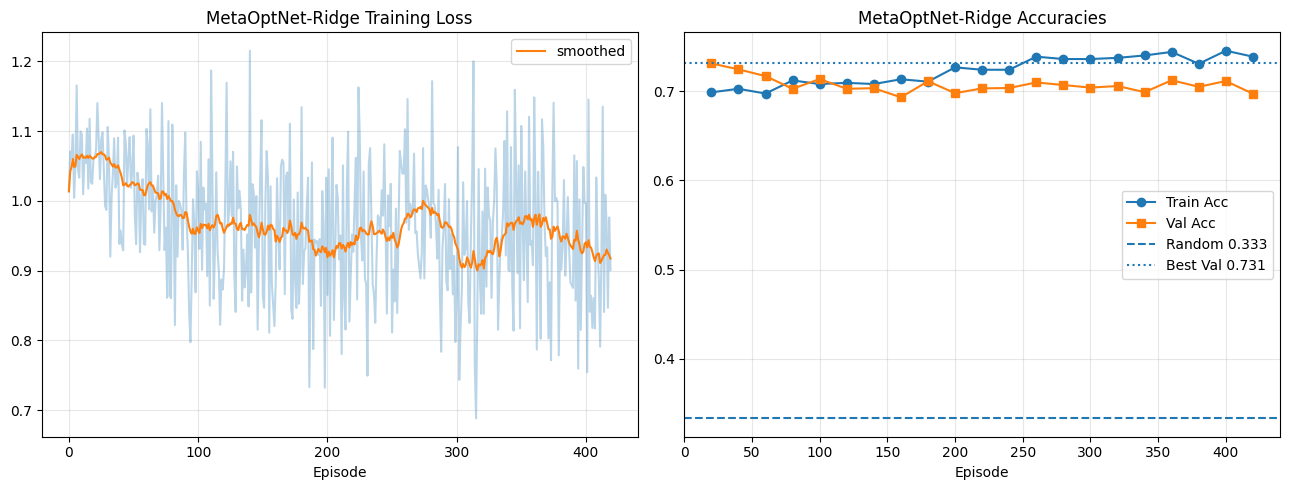

In [ ]:
"""
token_cnn_metaoptnet_ridge.py

Few-shot AMR mechanism classification with:
- Token-CNN k-mer encoder
- MetaOptNet-style ridge regression head
- 3-way 3-shot 5-query episodic meta-training

This is meant to be comparable to your Token-CNN ProtoNet / ProtoMAML baselines.
"""

# ============================================================
# 0) Imports, seeds, device
# ============================================================
import os, random, numpy as np, pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.backends.cudnn.deterministic = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ============================================================
# 1) Load & clean MEGARes processed CSV
# ============================================================
CSV_PATH = "megares_fasta_processed.csv"  # adjust if needed

df = pd.read_csv(CSV_PATH)
df = df.dropna(subset=["sequence", "mechanism"]).reset_index(drop=True)
df["sequence"] = df["sequence"].str.upper().str.replace(r"[^ACGT]", "", regex=True)

print("Dataset:", df.shape)
print("Unique mechanisms:", df["mechanism"].nunique())

# ============================================================
# 2) Mechanism split (70/15/15 by classes)
# ============================================================
mechs = np.array(sorted(df["mechanism"].unique()))
train_mechs, temp_mechs = train_test_split(
    mechs, test_size=0.30, random_state=RANDOM_SEED, shuffle=True
)
val_mechs, test_mechs = train_test_split(
    temp_mechs, test_size=0.50, random_state=RANDOM_SEED, shuffle=True
)

train_df = df[df.mechanism.isin(train_mechs)].reset_index(drop=True)
val_df   = df[df.mechanism.isin(val_mechs)].reset_index(drop=True)
test_df  = df[df.mechanism.isin(test_mechs)].reset_index(drop=True)

print(f"Train/Val/Test mechanisms: {len(train_mechs)}/{len(val_mechs)}/{len(test_mechs)}")
print(f"Train/Val/Test samples: {len(train_df)}/{len(val_df)}/{len(test_df)}")

# ============================================================
# 3) Tokenization (train-only vocab) - k-mers
# ============================================================
KMER_K = 5
PAD, UNK = "<PAD>", "<UNK>"

def kmers_from_seq(seq, k=KMER_K):
    L = len(seq)
    if L < k:
        return []
    return [seq[i:i+k] for i in range(L-k+1)]

from collections import Counter
counter = Counter()
for s in train_df["sequence"]:
    counter.update(kmers_from_seq(s, KMER_K))

tokens = [PAD, UNK] + sorted(counter.keys())
stoi = {t: i for i, t in enumerate(tokens)}
itos = {i: t for t, i in stoi.items()}
VOCAB_SIZE = len(stoi)
print("Vocab size:", VOCAB_SIZE)

def encode_ids(seq, k=KMER_K):
    arr = kmers_from_seq(seq, k)
    if not arr:
        return [stoi[UNK]]
    return [stoi.get(tok, stoi[UNK]) for tok in arr]

def encode_df_to_ids(dfp):
    ids = [encode_ids(s, KMER_K) for s in dfp["sequence"].tolist()]
    nums = dfp[["gc_content", "seq_len"]].to_numpy(np.float32)
    y = dfp["mechanism"].to_numpy()
    return ids, nums, y

train_ids, train_num, ytr = encode_df_to_ids(train_df)
val_ids,   val_num,   yva = encode_df_to_ids(val_df)
test_ids,  test_num,  yte = encode_df_to_ids(test_df)

# ============================================================
# 4) Padding, RC tokens, numeric standardization
# ============================================================
def pick_max_len(list_of_ids, pct=0.90):
    lens = np.array([len(x) for x in list_of_ids])
    return int(np.clip(np.quantile(lens, pct), 16, 2048))

MAX_LEN = 512
print("MAX_LEN:", MAX_LEN)

def pad_sequences(list_of_ids, max_len=MAX_LEN, pad_id=None):
    if pad_id is None:
        pad_id = stoi[PAD]
    out = np.full((len(list_of_ids), max_len), pad_id, dtype=np.int64)
    for i, seq in enumerate(list_of_ids):
        s = seq[:max_len]
        out[i, :len(s)] = s
    return out

# base tokens
Xtr_tok = pad_sequences(train_ids, MAX_LEN)
Xva_tok = pad_sequences(val_ids,   MAX_LEN)
Xte_tok = pad_sequences(test_ids,  MAX_LEN)

# reverse complement for TRAIN augmentation
_comp = str.maketrans("ACGT", "TGCA")
def rev_comp(seq):
    return seq.translate(_comp)[::-1]

train_ids_rc = [encode_ids(rev_comp(s), KMER_K) for s in train_df["sequence"].tolist()]
Xtr_tok_rc   = pad_sequences(train_ids_rc, MAX_LEN)

# standardize numeric features (train stats only)
num_mean = train_num.mean(axis=0, keepdims=True)
num_std  = train_num.std(axis=0, keepdims=True) + 1e-6
train_num = (train_num - num_mean) / num_std
val_num   = (val_num   - num_mean) / num_std
test_num  = (test_num  - num_mean) / num_std

# ============================================================
# 5) Episodic sampler with RC augmentation
# ============================================================
from collections import defaultdict

def mech_index(y):
    d = defaultdict(list)
    for i, lab in enumerate(y):
        d[lab].append(i)
    return {k: np.asarray(v, dtype=int) for k, v in d.items()}

def _choose_tokens_with_rc(Xtok, Xtok_rc, ids, rng, rc_prob=0.25):
    if Xtok_rc is None or rc_prob <= 0:
        return Xtok[ids]
    mask = rng.random(len(ids)) < rc_prob
    out = Xtok[ids].copy()
    if mask.any():
        out[mask] = Xtok_rc[ids[mask]]
    return out

def create_tasks(
    X_tok, X_num, y, idx_map,
    num_tasks=1000, N=3, K=3, Q=5,
    seed=42, X_tok_rc=None, rc_prob=0.25, augment_rc=False
):
    rng = np.random.default_rng(seed)
    tasks = []
    valid = [m for m, ids in idx_map.items() if len(ids) >= K + Q]
    if len(valid) < N:
        return tasks

    for _ in range(num_tasks):
        me_sel = rng.choice(valid, size=N, replace=False)
        s_tok, s_num, s_y = [], [], []
        q_tok, q_num, q_y = [], [], []
        for j, m in enumerate(me_sel):
            ids = rng.choice(idx_map[m], size=K+Q, replace=False)
            s, q = ids[:K], ids[K:K+Q]

            if augment_rc and (X_tok_rc is not None):
                s_tok.append(_choose_tokens_with_rc(X_tok, X_tok_rc, s, rng, rc_prob))
                q_tok.append(_choose_tokens_with_rc(X_tok, X_tok_rc, q, rng, rc_prob))
            else:
                s_tok.append(X_tok[s])
                q_tok.append(X_tok[q])
            s_num.append(X_num[s])
            q_num.append(X_num[q])
            s_y.append(np.full(K, j, np.int64))
            q_y.append(np.full(Q, j, np.int64))

        tasks.append({
            "s_tok": np.vstack(s_tok),
            "s_num": np.vstack(s_num),
            "s_y":   np.concatenate(s_y),
            "q_tok": np.vstack(q_tok),
            "q_num": np.vstack(q_num),
            "q_y":   np.concatenate(q_y),
            "mechs": list(me_sel)
        })
    return tasks

idx_tr = mech_index(ytr)
idx_va = mech_index(yva)
idx_te = mech_index(yte)

# episodic configs
N, K, Q = 3, 3, 5
RC_PROB = 0.25
SUPPORT_DROP = 0.03
QUERY_DROP   = 0.01

train_tasks = create_tasks(
    Xtr_tok, train_num, ytr, idx_tr,
    num_tasks=1500, N=N, K=K, Q=Q,
    seed=RANDOM_SEED, X_tok_rc=Xtr_tok_rc,
    rc_prob=RC_PROB, augment_rc=True
)

val_tasks = create_tasks(
    Xva_tok, val_num, yva, idx_va,
    num_tasks=300, N=N, K=K, Q=Q,
    seed=RANDOM_SEED, augment_rc=False
)

test_tasks = create_tasks(
    Xte_tok, test_num, yte, idx_te,
    num_tasks=500, N=N, K=K, Q=Q,
    seed=RANDOM_SEED, augment_rc=False
)

print(f"Tasks | train:{len(train_tasks)} val:{len(val_tasks)} test:{len(test_tasks)}  (N={N},K={K},Q={Q})")

# ============================================================
# 6) TokenDropout
# ============================================================
def token_dropout(arr, p=0.0, pad_id=0):
    if p <= 0:
        return arr
    mask = (np.random.rand(*arr.shape) < p)
    out = arr.copy()
    out[mask] = pad_id
    return out

# ============================================================
# 7) Token-CNN encoder (same as before)
# ============================================================
class CNNSeqEncoder(nn.Module):
    def __init__(
        self, vocab_size, pad_idx, max_len,
        embed_dim=256, token_dim=128,
        conv_channels=96, kernel_sizes=(3, 5, 7),
        use_cosine=True, num_features=2
    ):
        super().__init__()
        self.use_cosine = use_cosine
        self.pad_idx = pad_idx

        self.emb = nn.Embedding(vocab_size, token_dim, padding_idx=pad_idx)
        self.emb_dropout = nn.Dropout(0.20)

        self.convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv1d(token_dim, conv_channels, kernel_size=k, padding=k//2),
                nn.ReLU(),
                nn.Dropout1d(0.10)
            ) for k in kernel_sizes
        ])

        self.num_proj = nn.Sequential(
            nn.Linear(num_features, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
        )

        fused_in = conv_channels * len(kernel_sizes) * 2 + 32  # max+avg pool
        self.proj = nn.Sequential(
            nn.Linear(fused_in, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.50),
            nn.Linear(512, embed_dim)
        )

        # log_temp is unused by MetaOptNet head but harmless to keep
        self.log_temp = nn.Parameter(torch.zeros(1))

    def forward(self, tokens, nums):
        x = self.emb(tokens)          # [B, L, token_dim]
        x = self.emb_dropout(x)
        x = x.transpose(1, 2)         # [B, token_dim, L]

        pooled = []
        for block in self.convs:
            h = block(x)                              # [B, C, L]
            p_max  = F.adaptive_max_pool1d(h, 1).squeeze(-1)
            p_mean = F.adaptive_avg_pool1d(h, 1).squeeze(-1)
            pooled.extend([p_max, p_mean])

        h_text = torch.cat(pooled, dim=1)
        h_num  = self.num_proj(nums)
        h = torch.cat([h_text, h_num], dim=1)

        z = self.proj(h)               # [B, embed_dim]
        if self.use_cosine:
            z = F.normalize(z, p=2, dim=1)
        return z

# ============================================================
# 8) MetaOptNet ridge head + evaluation
# ============================================================
def metaoptnet_ridge_head(s_z, s_y, q_z, l2_reg=1e-3):
    """
    s_z: [S, d] support embeddings
    s_y: [S]    support labels {0,...,C-1}
    q_z: [Q, d] query embeddings
    Returns:
        logits: [Q, C]
        W:      [d, C]
    """
    device = s_z.device
    S, d = s_z.shape
    num_classes = int(s_y.max().item()) + 1  # should equal N

    # One-hot labels: [S, C]
    Y = F.one_hot(s_y, num_classes=num_classes).float()

    Z = s_z  # [S, d]

    # A = Z^T Z + λ I_d  (d x d)
    # B = Z^T Y          (d x C)
    regI = l2_reg * torch.eye(d, device=device)
    A = Z.t() @ Z + regI
    B = Z.t() @ Y

    # Solve A W = B -> W: [d, C]
    W = torch.linalg.solve(A, B)

    # Query logits: [Q, d] @ [d, C] = [Q, C]
    logits = q_z @ W
    return logits, W

@torch.no_grad()
def evaluate_metaoptnet(model, tasks, device, l2_reg=1e-3):
    model.eval()
    accs, losses = [], []
    for t in tasks:
        s_tok = torch.from_numpy(t["s_tok"]).long().to(device)
        s_num = torch.from_numpy(t["s_num"]).float().to(device)
        q_tok = torch.from_numpy(t["q_tok"]).long().to(device)
        q_num = torch.from_numpy(t["q_num"]).float().to(device)
        s_y   = torch.from_numpy(t["s_y"]).long().to(device)
        q_y   = torch.from_numpy(t["q_y"]).long().to(device)

        s_z = model(s_tok, s_num)
        q_z = model(q_tok, q_num)

        logits_q, _ = metaoptnet_ridge_head(s_z, s_y, q_z, l2_reg=l2_reg)
        loss = F.cross_entropy(logits_q, q_y)

        preds = logits_q.argmax(dim=1)
        accs.append((preds == q_y).float().mean().item())
        losses.append(loss.item())

    return float(np.mean(accs)), float(np.std(accs)), float(np.mean(losses))

# ============================================================
# 9) Meta-training: Token-CNN + MetaOptNet-Ridge
# ============================================================
EMBED_DIM = 256
model = CNNSeqEncoder(
    vocab_size=VOCAB_SIZE,
    pad_idx=stoi[PAD],
    max_len=MAX_LEN,
    embed_dim=EMBED_DIM,
    token_dim=128,
    conv_channels=96,
    kernel_sizes=(3, 5, 7),
    use_cosine=True,      # try False in ablation
    num_features=2
).to(device)

LR = 2e-4
L2_REG = 1e-3   # ridge λ (key hyperparameter to sweep)

opt   = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=2e-4)
sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=800)

EPISODES   = 1400
EVAL_EVERY = 20
PATIENCE   = 20

print({
    "model": "Token-CNN + MetaOptNet-Ridge",
    "cosine_norm": model.use_cosine,
    "rc_train": True,
    "rc_prob": RC_PROB,
    "max_len": MAX_LEN,
    "k": KMER_K,
    "dropout_support": SUPPORT_DROP,
    "dropout_query": QUERY_DROP,
    "lr": LR,
    "episodes": EPISODES,
    "ridge_l2": L2_REG,
})

best_val, bad = 0.0, 0
train_losses, train_accs, val_accs = [], [], []

PAD_ID = stoi[PAD]

print("Training MetaOptNet-Ridge...")
for ep in tqdm(range(1, EPISODES+1)):
    model.train()
    t = random.choice(train_tasks)

    # restrained token dropout
    t_s_tok = token_dropout(t["s_tok"], p=SUPPORT_DROP, pad_id=PAD_ID)
    t_q_tok = token_dropout(t["q_tok"], p=QUERY_DROP,   pad_id=PAD_ID)

    s_tok = torch.from_numpy(t_s_tok).long().to(device)
    s_num = torch.from_numpy(t["s_num"]).float().to(device)
    q_tok = torch.from_numpy(t_q_tok).long().to(device)
    q_num = torch.from_numpy(t["q_num"]).float().to(device)
    s_y   = torch.from_numpy(t["s_y"]).long().to(device)
    q_y   = torch.from_numpy(t["q_y"]).long().to(device)

    opt.zero_grad()

    s_z = model(s_tok, s_num)
    q_z = model(q_tok, q_num)

    logits_q, _ = metaoptnet_ridge_head(s_z, s_y, q_z, l2_reg=L2_REG)
    loss = F.cross_entropy(logits_q, q_y)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), 5.0)
    opt.step()
    sched.step()

    train_losses.append(loss.item())

    # (log_temp is unused but keep it bounded anyway)
    with torch.no_grad():
        model.log_temp.data.clamp_(-3.0, 0.5)

    # periodic evaluation
    if ep % EVAL_EVERY == 0:
        tr_acc, tr_std, _ = evaluate_metaoptnet(model, train_tasks[:50], device, l2_reg=L2_REG)
        va_acc, va_std, _ = evaluate_metaoptnet(model, val_tasks,          device, l2_reg=L2_REG)
        train_accs.append(tr_acc)
        val_accs.append(va_acc)

        mean_loss = float(np.mean(train_losses[-EVAL_EVERY:]))

        print(f"[{ep}/{EPISODES}] loss={mean_loss:.3f}  "
              f"train={tr_acc:.3f}±{tr_std:.3f}  val={va_acc:.3f}±{va_std:.3f}  λ={L2_REG:.1e}")

        if va_acc > best_val:
            best_val, bad = va_acc, 0
            torch.save(model.state_dict(), "best_metaoptnet_cnn.pt")
            print("  -> New best model saved!")
        else:
            bad += 1

        if bad >= PATIENCE:
            print("Early stopping."); break

print("Best Val Acc (MetaOptNet-Ridge):", round(best_val, 4))

# ============================================================
# 10) Final test evaluation
# ============================================================
if os.path.exists("best_metaoptnet_cnn.pt"):
    model.load_state_dict(torch.load("best_metaoptnet_cnn.pt", map_location=device))
    test_acc, test_std, test_loss = evaluate_metaoptnet(model, test_tasks, device, l2_reg=L2_REG)
    print(f"TEST  acc={test_acc:.3f} ± {test_std:.3f} | loss={test_loss:.3f} | episodes={len(test_tasks)}")
else:
    print("No saved MetaOptNet model found for testing")

print(f"Random baseline (1/N): {1.0/float(N):.3f}")

# ============================================================
# 11) Plots
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(train_losses, alpha=0.3)
axes[0].plot(pd.Series(train_losses).rolling(window=20, min_periods=1).mean(), label="smoothed")
axes[0].set_title("MetaOptNet-Ridge Training Loss")
axes[0].set_xlabel("Episode")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

eval_steps = [i * EVAL_EVERY for i in range(1, len(val_accs) + 1)]
axes[1].plot(eval_steps, train_accs, marker='o', label="Train Acc")
axes[1].plot(eval_steps, val_accs, marker='s', label="Val Acc")
axes[1].axhline(1.0 / N, linestyle='--', label=f"Random {1.0/N:.3f}")
axes[1].axhline(best_val, linestyle=':', label=f"Best Val {best_val:.3f}")
axes[1].set_title("MetaOptNet-Ridge Accuracies")
axes[1].set_xlabel("Episode")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


[t-SNE] Using 270 samples from test across 10 classes.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



=== t-SNE Diagnostic Summary (MetaOptNet-Ridge) ===
Number of points visualized:      270
Number of unique mechanisms:    10
Embeddings dim before t-SNE:      256
Embeddings dim after  t-SNE:      2
Silhouette score:                 -0.118
Mean intra-class distance:        13.204
Mean inter-class distance:        17.764
Inter / Intra ratio:              1.345
ARI (KMeans vs true):             0.198
NMI (KMeans vs true):             0.394



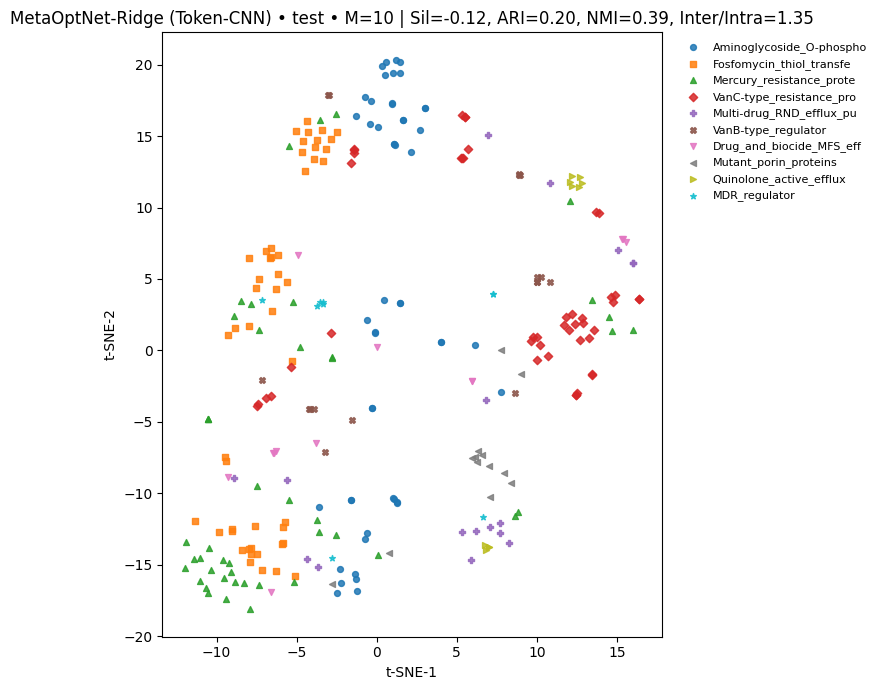

In [ ]:
# ============================
# t-SNE for Token-CNN + MetaOptNet-Ridge (with summary stats)
# ============================
from sklearn.manifold import TSNE
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

# make sure we're using the MetaOptNet weights
model.load_state_dict(torch.load("best_metaoptnet_cnn.pt", map_location=device))
model.eval()

LABEL_COL      = "mechanism"  # or "group" if you run the hierarchy ablation
SUBSET_SOURCE  = "test"       # {"train","val","test","all"}
TOP_M_CLASSES  = 10
N_PER_CLASS    = 50
TSNE_PERPLEX   = 30
RANDOM_STATE   = 42

# -------- choose subset (same logic as ProtoNet) --------
base_df = {"train": train_df, "val": val_df, "test": test_df}.get(SUBSET_SOURCE, df)
counts = base_df[LABEL_COL].value_counts()
kept_labels = counts.head(TOP_M_CLASSES).index.tolist()

subset_list = []
for lab in kept_labels:
    sub = base_df[base_df[LABEL_COL] == lab]
    if len(sub) > N_PER_CLASS:
        sub = sub.sample(N_PER_CLASS, random_state=RANDOM_STATE)
    subset_list.append(sub)
subset = pd.concat(subset_list).reset_index(drop=True)
print(f"[t-SNE] Using {len(subset)} samples from {SUBSET_SOURCE} across {len(kept_labels)} classes.")

# -------- encode with SAME pipeline (k-mers + standardization) --------
ids = [encode_ids(s, KMER_K) for s in subset["sequence"].tolist()]
tok = np.full((len(ids), MAX_LEN), stoi[PAD], dtype=np.int64)
for i, seq in enumerate(ids):
    s = seq[:MAX_LEN]
    tok[i, :len(s)] = s

num = subset[["gc_content", "seq_len"]].to_numpy(np.float32)
num = (num - num_mean) / num_std  # use train stats from earlier

y_str = subset[LABEL_COL].values  # mechanism (or group) names

with torch.no_grad():
    Xt = torch.from_numpy(tok).long().to(device)
    Xn = torch.from_numpy(num).float().to(device)
    Z  = model(Xt, Xn).detach().cpu().numpy()  # [N, 256]

num_points  = len(Z)
num_classes = len(np.unique(y_str))
emb_before  = Z.shape[1]

perplexity = min(TSNE_PERPLEX, max(5, len(Z)//4 - 1))
tsne = TSNE(
    n_components=2,
    perplexity=perplexity,
    metric="euclidean",
    init="pca",
    learning_rate="auto",
    n_iter=1000,
    random_state=RANDOM_STATE,
    verbose=0,
)
Z2 = tsne.fit_transform(Z)
emb_after = Z2.shape[1]

# -------- clustering diagnostics (same as ProtoNet) --------
label_to_int = {lab: i for i, lab in enumerate(kept_labels)}
y_int = np.array([label_to_int.get(v, -1) for v in y_str])

sil = silhouette_score(Z2, y_int, metric="euclidean") if num_classes > 1 else float("nan")

kmeans = KMeans(n_clusters=num_classes, n_init="auto", random_state=RANDOM_STATE)
pred = kmeans.fit_predict(Z2)
ari = adjusted_rand_score(y_int, pred)
nmi = normalized_mutual_info_score(y_int, pred)

D = pairwise_distances(Z2, metric="euclidean")
intra = [D[i, y_int == y_int[i]].mean() for i in range(num_points)]
inter = [D[i, y_int != y_int[i]].mean() for i in range(num_points)]
mean_intra = float(np.nanmean(intra))
mean_inter = float(np.nanmean(inter))
ratio = (mean_inter / mean_intra) if mean_intra > 0 else float("nan")

print("\n=== t-SNE Diagnostic Summary (MetaOptNet-Ridge) ===")
print(f"Number of points visualized:      {num_points}")
print(f"Number of unique {LABEL_COL}s:    {num_classes}")
print(f"Embeddings dim before t-SNE:      {emb_before}")
print(f"Embeddings dim after  t-SNE:      {emb_after}")
print(f"Silhouette score:                 {sil:.3f}")
print(f"Mean intra-class distance:        {mean_intra:.3f}")
print(f"Mean inter-class distance:        {mean_inter:.3f}")
print(f"Inter / Intra ratio:              {ratio:.3f}")
print(f"ARI (KMeans vs true):             {ari:.3f}")
print(f"NMI (KMeans vs true):             {nmi:.3f}")
print("===============================================\n")

# -------- plot --------
plt.figure(figsize=(8, 7))
markers = ["o", "s", "^", "D", "P", "X", "v", "<", ">", "*"]
for i, lab in enumerate(kept_labels):
    idx = (y_str == lab)
    plt.scatter(
        Z2[idx, 0],
        Z2[idx, 1],
        s=18,
        marker=markers[i % len(markers)],
        alpha=0.85,
        label=lab[:24],
    )

plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.title(
    f"MetaOptNet-Ridge (Token-CNN) • {SUBSET_SOURCE} • M={num_classes} | "
    f"Sil={sil:.2f}, ARI={ari:.2f}, NMI={nmi:.2f}, Inter/Intra={ratio:.2f}"
)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=8,
    ncol=1,
    frameon=False,
)
plt.tight_layout()
plt.show()
